In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

from numba import jit

import sys
sys.path.append('..')
from lib import *
from lib.maxent import *
from lib.netmhcrunutils import run_netMHC
plt.style.use('../peptidome.mplstyle')
import pyrepseq.plotting as pp

In [7]:
run_netMHC('../../data/UP000005640Human.fasta.gz', 'human.csv', 'HLA-A0201')

/media/andreas/data/repos/peptidome/dependencies/netMHC-4.0/netMHC -f /media/andreas/data/repos/peptidome/data/UP000005640Human.fasta.gz -xls -xlsfile /media/andreas/data/repos/peptidome/code/maxent/human.csv-HLA-A0201.csv -a HLA-A0201


In [8]:
run_netMHC(proteome_path('Humanviruses'), 'virus.csv', 'HLA-A0201')

/media/andreas/data/repos/peptidome/dependencies/netMHC-4.0/netMHC -f /media/andreas/data/repos/peptidome/data/human-viruses-uniref90-filtered.fasta -xls -xlsfile /media/andreas/data/repos/peptidome/code/maxent/virus.csv-HLA-A0201.csv -a HLA-A0201


In [60]:
flat = [''.join(np.random.choice(np.array(list(aminoacids)), size=9)) for i in range(20000)]

In [63]:
ns_flat = nndist_hamming_distribution(flat, reference)
ps_flat = ns_flat/np.sum(ns_flat)
ps_flat

array([5.0000e-05, 3.6500e-03, 1.8585e-01, 8.1045e-01])

In [25]:
reference = set(count_kmers_proteome(human, k, clean=True))

In [36]:
virus = set(count_kmers_proteome(proteome_path('Humanviruses'), k, clean=True))

In [44]:
virus = list(pd.Series(list(virus)).sample(10000))
virus

['SNIETVIEF',
 'GWGDHCSTL',
 'KGITLLNRL',
 'CLIFLIGCL',
 'SSSILFLNC',
 'NANCKDHTS',
 'FGAASTLKR',
 'MIVATKESL',
 'NASVATPGE',
 'PTNEELQQL',
 'DPGTGFEDE',
 'YFGLFETPN',
 'REASLPEAP',
 'TLLWSTGNG',
 'IFLVQRYEL',
 'ARGDAARAH',
 'ADEQVLKAK',
 'AVTTGRAYD',
 'PSQYDVSGG',
 'CVCNFCCFL',
 'GLYDVFLEN',
 'CVDRWPFFP',
 'DDAVSYIKH',
 'AVKFLDAWF',
 'ESEAAFGPA',
 'LLNLKLLGI',
 'RGVCYNGWL',
 'TFQCWQYMD',
 'QEAENTLIN',
 'RIVDKFGKN',
 'INTDTLAPY',
 'MFLPKPEAG',
 'TLRNGLPDF',
 'CVEHGEHHI',
 'KRFINRLKK',
 'SGNVKITVG',
 'RWKPQNPAG',
 'IRAVSVPTP',
 'VLMKLGEQP',
 'EYQNLWLSA',
 'SCKHSLVGP',
 'RVGITMVPV',
 'KWHGPLPRR',
 'SKRSRRGAR',
 'ALSNAPPRR',
 'SWDTTVYHR',
 'FDYMAIHRS',
 'LRDNLPVAG',
 'YWKLLVVTQ',
 'AASSASQAL',
 'AEFKRGGGR',
 'AAPIFKTDE',
 'MAGFPGKEA',
 'SSNKCVNLY',
 'ELAESKRDI',
 'NCSVASGVH',
 'ILPDTQGRF',
 'NSSNTAIGP',
 'SPGPPDPDP',
 'GMGYHLGLG',
 'RVAPEKLVS',
 'SLLNQIWQK',
 'TLHFSLFDD',
 'VLAHLNVMD',
 'GHAPAPVHQ',
 'DHSGLFDIY',
 'KSKSHLNKD',
 'QALEGMEGM',
 'TTNTARAFA',
 'LENLGHILS',
 'PRACGPFSS',
 'AQRR

In [45]:
ns = nndist_hamming_distribution(virus, reference)
ps = ns/np.sum(ns)

In [46]:
human_hla = pd.read_csv('human.csv-HLA-A0201.csv', index_col=0)

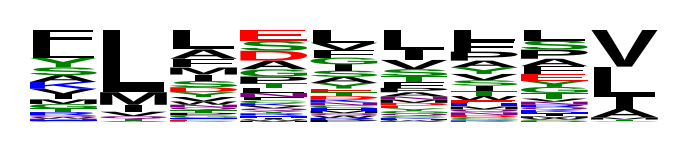

In [70]:
pp.seqlogos(human_hla['Peptide']);

In [47]:
virus_hla = pd.read_csv('virus.csv-HLA-A0201.csv', index_col=0)

In [48]:
reference_hla = set(human_hla['Peptide'])

In [49]:
ns_hla = nndist_hamming_distribution(virus_hla['Peptide'], reference_hla)

In [50]:
ps_hla = ns_hla/np.sum(ns_hla)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


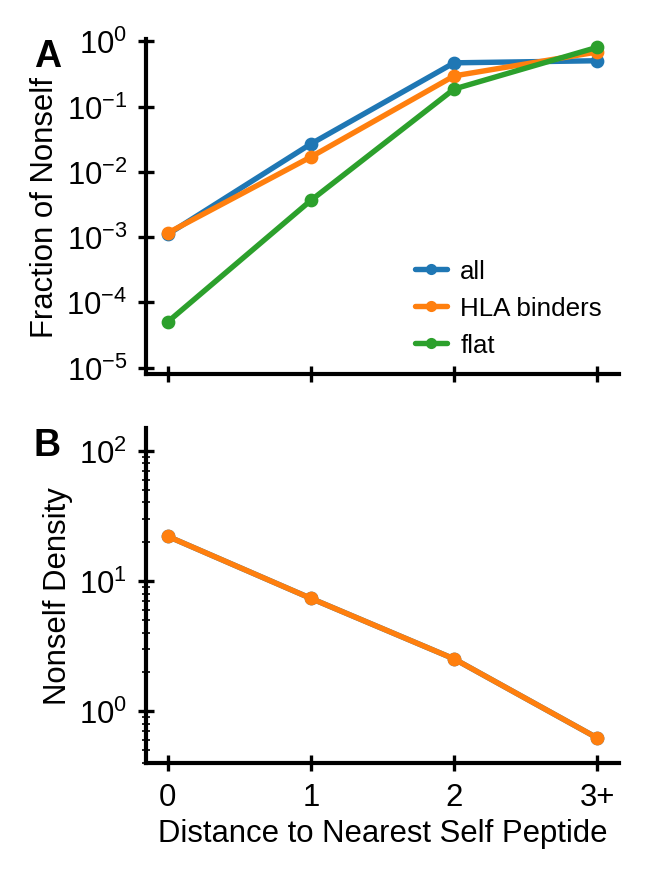

In [71]:
fig, axes = plt.subplots(figsize=(2.25, 3.0), nrows=2, sharex=True)
axes[0].plot(range(4), ps, '-o', label='all')
axes[0].plot(range(4), ps_hla, '-o', label='HLA binders')
axes[0].plot(range(4), ps_flat, '-o', label='flat')
for p in [ps, ps_hla]:
    axes[1].plot(range(4), ps/ps_flat, '-o')


for ax in axes:
    ax.set_yscale('log')
    ax.set_xticks([0, 1, 2, 3])
    ax.set_xticklabels([0, 1, 2, '3+'])

axes[0].set_ylim(8e-6, 1.1)
axes[0].set_yticks(10**np.arange(-5.0, 1.0, 1.0))
axes[1].set_yticks([1e0, 1e1, 1e2])
axes[1].set_ylim(4e-1, 1.5e2)

axes[0].set_ylabel('Fraction of Nonself')
axes[0].legend(loc='lower right')
axes[1].set_ylabel('Nonself Density')
axes[1].legend(loc='upper right')

axes[1].set_xlabel('Distance to Nearest Self Peptide')
pp.label_axes(fig, xy=(-0.18, 1.0), va='top', ha='right')
fig.tight_layout()
fig.savefig('neighbors_hla.svg')
fig.savefig('neighbors_hla.png')